# BioBot_FDS_06_Models_Using_Balanced_Ds_Moving_Window
## Deliverable_06: Implementing several models (KNN, SVC, NN/TF-Keras) using a balanced dataset and moving windows
Author/code developer: Yan Bello. 20/11/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---



In [0]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive: 
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL/"

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 6.1 Load a dataframe with prepared info from ADL/Falls dataset

In [0]:
# In these cells, we are using a balanced dataset, prepared in advanced to include
# moving windows/slices of the ADL/Fall data. The windows sizes are explained in the preparation code file.
my_data_file_name = FILE_DIRECTORY + "Unified_ADL_Falls_BAL-completo.txt"

import pandas as pd

# Create a dataframe and load data
df_ADL_Falls = pd.DataFrame(pd.read_csv(my_data_file_name, sep = ','))

df_ADL_Falls.drop('0', axis=1, inplace=True)

df_only_ADLs = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "D"]
df_only_Falls = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "F"]

# Show part of the data frame
print(df_only_ADLs.tail())
print(df_only_Falls.tail())

       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
73877        36      D14      SA        D  D14_SA17_R04.txt      -0.210534   
73878        37      D14      SA        D  D14_SA17_R04.txt      -0.447829   
73879        38      D14      SA        D  D14_SA17_R04.txt      -0.284214   
73880        39      D14      SA        D  D14_SA17_R04.txt      -0.346115   
73881        40      D14      SA        D  D14_SA17_R04.txt      -0.435528   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
73877       347    184.245        42         305    ...           1.657134   
73878       347    190.090        42         305    ...           1.657134   
73879       347    198.075        42         305    ...           1.657134   
73880       347    207.485        49         298    ...           1.657134   
73881       336    208.140        49         287    ...           1.657134   

       skewness_S1_N_VER  std_S1_N_VER  var_S1_N_VER   corr_HV

## 6.2 Prepare ADL/FALLs data for TRAINING/VAL/TEST sets 

### Split FALLs data into TRAINING/VAL/TEST sets

In [0]:
"""
    Preparing the FALLS DATASETs
    In this cell, we prepare the TRAINING/VAL/TEST DATASET splits for the falls data.
    Using a 70%-20%-10% split
"""

import random
import math
from numpy.random import permutation

df_filenames = df_only_Falls.File
df_filenames = pd.DataFrame(list(set(df_filenames)))


# Randomly shuffle the index of each set (ADLs and Falls)
# -------------------------------------------------------
# First we prepare the sets of ADLs
random_indices = permutation(df_filenames.index)
# Use a test-split (of 30% of the items)
train_split = math.floor(len(df_filenames)*0.7)
val_split = math.floor(len(df_filenames)*0.2)
# Train set with 70% of the items.
df_only_Falls_train_FN = df_filenames.loc[random_indices[0:train_split]]
# Test set with 20% of items
df_only_Falls_val_FN = df_filenames.loc[random_indices[train_split:train_split+val_split]]
# VAL set with 10% of items
df_only_Falls_test_FN = df_filenames.loc[random_indices[train_split+val_split:]]

print("-------TOTAL--------------------")
print(str(len(df_filenames)))
print("-------train_split--------------------")
print(str(train_split))
print(str(len(df_only_Falls_train_FN)))
print("-------VAL_split--------------------")
print(str(val_split))
print(str(len(df_only_Falls_val_FN)))
print("-------Test_split--------------------")
test_split = len(df_filenames)-(train_split+val_split)
print(str(test_split))
print(str(len(df_only_Falls_test_FN)))
print("-------SUMA de_splits--------------------")
print(str(test_split+train_split+val_split))

print("-------HEADS: train + val + test --------------------")
print(df_only_Falls_train_FN.head())
print(df_only_Falls_val_FN.head())
print(df_only_Falls_test_FN.head())
print("---------------------------")

print("-------% train  --------------------")
print(len(df_only_Falls_train_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))
print("-------% val  --------------------")
print(len(df_only_Falls_val_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))
print("-------% test  --------------------")
print(len(df_only_Falls_test_FN)/(len(df_only_Falls_train_FN)+len(df_only_Falls_val_FN)+len(df_only_Falls_test_FN)))


# Test set with 10% of items
df_only_Falls_test = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_test_FN[0])]
# Val set with 20% of items
df_only_Falls_val = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_val_FN[0])]
# Train set with 70% of the items.
df_only_Falls_train = df_only_Falls[df_only_Falls.File.isin(df_only_Falls_train_FN[0])]


print("---------------------------")
print("---------------------------")
print(df_only_Falls_test.head())
print(len(df_only_Falls_test))
print(df_only_Falls_val.head())
print(len(df_only_Falls_val))
print(df_only_Falls_train.head())
print(len(df_only_Falls_train))

print("---------------------------")


-------TOTAL--------------------
1798
-------train_split--------------------
1258
1258
-------VAL_split--------------------
359
359
-------Test_split--------------------
181
181
-------SUMA de_splits--------------------
1798
-------HEADS: train + val + test --------------------
                     0
380   F01_SA02_R01.txt
578   F05_SA02_R04.txt
203   F06_SA20_R01.txt
734   F01_SE06_R05.txt
1040  F07_SA08_R04.txt
                     0
1152  F10_SA22_R01.txt
486   F10_SE06_R03.txt
1022  F01_SA19_R04.txt
1441  F02_SA16_R01.txt
887   F02_SA04_R05.txt
                     0
681   F14_SA08_R02.txt
706   F07_SA13_R05.txt
1134  F12_SA22_R03.txt
543   F14_SA03_R04.txt
1627  F05_SA07_R05.txt
---------------------------
-------% train  --------------------
0.699666295884316
-------% val  --------------------
0.19966629588431592
-------% test  --------------------
0.10066740823136819
---------------------------
---------------------------
       0_Win_ID Act_Type Age_Cat Fall_ADL              Fi

### Split ADLs data into TRAINING/VAL/TEST sets 

In [0]:
"""
    Preparing the ADLs DATASETs
    In this cell, we prepare the TRAINING/VAL/TEST DATASET splits for the ADLs data.
    Using a 70%-20%-10% split
"""

import random
import math
from numpy.random import permutation

df_filenames = df_only_ADLs.File
df_filenames = pd.DataFrame(list(set(df_filenames)))


# Randomly shuffle the index of each set (ADLs and Falls)
# -------------------------------------------------------
# First we prepare the sets of ADLs
random_indices = permutation(df_filenames.index)
# Use a test-split (of 30% of the items)
train_split = math.floor(len(df_filenames)*0.7)
val_split = math.floor(len(df_filenames)*0.2)
# Train set with 70% of the items.
df_only_ADLs_train_FN = df_filenames.loc[random_indices[0:train_split]]
# Test set with 20% of items
df_only_ADLs_val_FN = df_filenames.loc[random_indices[train_split:train_split+val_split]]
# VAL set with 10% of items
df_only_ADLs_test_FN = df_filenames.loc[random_indices[train_split+val_split:]]

print("-------TOTAL--------------------")
print(str(len(df_filenames)))
print("-------train_split--------------------")
print(str(train_split))
print(str(len(df_only_ADLs_train_FN)))
print("-------VAL_split--------------------")
print(str(val_split))
print(str(len(df_only_ADLs_val_FN)))
print("-------Test_split--------------------")
test_split = len(df_filenames)-(train_split+val_split)
print(str(test_split))
print(str(len(df_only_ADLs_test_FN)))
print("-------SUMA de_splits--------------------")
print(str(test_split+train_split+val_split))

print("-------HEADS: train + val + test --------------------")
print(df_only_ADLs_train_FN.head())
print(df_only_ADLs_val_FN.head())
print(df_only_ADLs_test_FN.head())
print("---------------------------")

print("-------% train  --------------------")
print(len(df_only_ADLs_train_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))
print("-------% val  --------------------")
print(len(df_only_ADLs_val_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))
print("-------% test  --------------------")
print(len(df_only_ADLs_test_FN)/(len(df_only_ADLs_train_FN)+len(df_only_ADLs_val_FN)+len(df_only_ADLs_test_FN)))


# Test set with 10% of items
df_only_ADLs_test = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_test_FN[0])]
# Val set with 20% of items
df_only_ADLs_val = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_val_FN[0])]
# Train set with 70% of the items.
df_only_ADLs_train = df_only_ADLs[df_only_ADLs.File.isin(df_only_ADLs_train_FN[0])]


print("---------------------------")
print("---------------------------")
print(df_only_ADLs_test.head())
print(len(df_only_ADLs_test))
print(df_only_ADLs_val.head())
print(len(df_only_ADLs_val))
print(df_only_ADLs_train.head())
print(len(df_only_ADLs_train))

print("---------------------------")


-------TOTAL--------------------
1798
-------train_split--------------------
1258
1258
-------VAL_split--------------------
359
359
-------Test_split--------------------
181
181
-------SUMA de_splits--------------------
1798
-------HEADS: train + val + test --------------------
                     0
972   D15_SA05_R02.txt
300   D17_SA14_R02.txt
1608  D17_SA13_R03.txt
732   D14_SE01_R01.txt
1561  D09_SA19_R04.txt
                     0
196   D13_SA12_R03.txt
730   D17_SA12_R03.txt
1115  D15_SA14_R05.txt
1472  D18_SA04_R05.txt
1189  D09_SA15_R05.txt
                     0
1247  D05_SA13_R03.txt
367   D16_SA20_R01.txt
365   D05_SE07_R03.txt
58    D12_SA05_R05.txt
1423  D09_SE01_R02.txt
---------------------------
-------% train  --------------------
0.699666295884316
-------% val  --------------------
0.19966629588431592
-------% test  --------------------
0.10066740823136819
---------------------------
---------------------------
     0_Win_ID Act_Type Age_Cat Fall_ADL              File

### Concat ADL+ FALLs data for Test Set

In [0]:
# Prepare dataset with Test examplars

frames = [df_only_Falls_test, df_only_ADLs_test]
df_ADL_Falls_test = pd.concat(frames)
print("Test ADLs: "+ str(len(df_only_ADLs_test)))
print("Test Falls: "+ str(len(df_only_Falls_test)))
print("Test ALL: "+ str(len(df_ADL_Falls_test)))

print(df_ADL_Falls_test.head())
print(df_ADL_Falls_test.tail())


Test ADLs: 7421
Test Falls: 7421
Test ALL: 14842
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
74210         0      F01      SA        F  F01_SA02_R04.txt       1.372828   
74211         1      F01      SA        F  F01_SA02_R04.txt       0.236132   
74212         2      F01      SA        F  F01_SA02_R04.txt       0.082957   
74213         3      F01      SA        F  F01_SA02_R04.txt       0.036610   
74214         4      F01      SA        F  F01_SA02_R04.txt      -0.081237   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
74210       113     14.660      -109         222    ...           0.549762   
74211       113     18.515       -81         194    ...           0.549762   
74212       113     17.510       -35         148    ...           0.549762   
74213       113     14.995       -44         157    ...           0.549762   
74214       113     13.875       -44         157    ...           0.549762   

       skewne

### Concat ADL+ FALLs data for VALIDATION Set

In [0]:
# Prepare dataset with VALIDATION examplars

frames = [df_only_Falls_val, df_only_ADLs_val]
df_ADL_Falls_val = pd.concat(frames)
print("VAL ADLs: "+ str(len(df_only_ADLs_val)))
print("VAL Falls: "+ str(len(df_only_Falls_val)))
print("VAL ALL: "+ str(len(df_ADL_Falls_val)))

print(df_ADL_Falls_val.head())
print(df_ADL_Falls_val.tail())


VAL ADLs: 14719
VAL Falls: 14719
VAL ALL: 29438
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
73882         0      F01      SA        F  F01_SA01_R01.txt       1.171828   
73883         1      F01      SA        F  F01_SA01_R01.txt       1.165338   
73884         2      F01      SA        F  F01_SA01_R01.txt       1.252298   
73885         3      F01      SA        F  F01_SA01_R01.txt       1.573220   
73886         4      F01      SA        F  F01_SA01_R01.txt       2.841073   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
73882        85     -2.090      -114         199    ...           0.554633   
73883        85     -2.670      -114         199    ...           0.554633   
73884        85     -2.095      -114         199    ...           0.554633   
73885        85      0.385      -114         199    ...           0.554633   
73886        85      4.115      -114         199    ...           0.554633   

       skewnes

### Concat ADL+ FALLs data for TRAINING Set

In [0]:
# Prepare dataset with Train examplars

frames = [df_only_Falls_train, df_only_ADLs_train]
df_ADL_Falls_train = pd.concat(frames)
print("train ADLs: "+ str(len(df_only_ADLs_train)))
print("train Falls: "+ str(len(df_only_Falls_train)))
print("train ALL: "+ str(len(df_ADL_Falls_train)))

print(df_ADL_Falls_train.head())
print(df_ADL_Falls_train.tail())


train ADLs: 51742
train Falls: 51578
train ALL: 103320
       0_Win_ID Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  \
74005         0      F01      SA        F  F01_SA01_R04.txt       2.378725   
74006         1      F01      SA        F  F01_SA01_R04.txt       1.758380   
74007         2      F01      SA        F  F01_SA01_R04.txt       1.259635   
74008         3      F01      SA        F  F01_SA01_R04.txt       1.228117   
74009         4      F01      SA        F  F01_SA01_R04.txt       1.033344   

       max_S1_X  mean_S1_X  min_S1_X  range_S1_X    ...     range_S1_N_VER  \
74005       114     12.435      -181         295    ...           1.137148   
74006       114     10.215      -181         295    ...           1.137148   
74007       114     14.545      -181         295    ...           1.137148   
74008       114     17.245      -181         295    ...           1.105898   
74009       114     16.290      -181         295    ...           1.124796   

       

## 6.3 Define and train the K-Neighbors Classifier

In [0]:
import numpy as np

# The columns that we will be making predictions with.
x_columns = ['kurtosis_S1_X','max_S1_X','mean_S1_X','min_S1_X','range_S1_X','skewness_S1_X','std_S1_X','var_S1_X',
             'kurtosis_S1_Y','max_S1_Y','mean_S1_Y','min_S1_Y','range_S1_Y','skewness_S1_Y','std_S1_Y','var_S1_Y',
             'kurtosis_S1_Z','max_S1_Z','mean_S1_Z','min_S1_Z','range_S1_Z','skewness_S1_Z','std_S1_Z','var_S1_Z',
             'kurtosis_S1_N_XYZ','max_S1_N_XYZ','mean_S1_N_XYZ','min_S1_N_XYZ','range_S1_N_XYZ','skewness_S1_N_XYZ','std_S1_N_XYZ','var_S1_N_XYZ',
             'kurtosis_S1_N_HOR','max_S1_N_HOR','mean_S1_N_HOR','min_S1_N_HOR','range_S1_N_HOR','skewness_S1_N_HOR','std_S1_N_HOR','var_S1_N_HOR',
             'kurtosis_S1_N_VER','max_S1_N_VER','mean_S1_N_VER','min_S1_N_VER','range_S1_N_VER','skewness_S1_N_VER','std_S1_N_VER','var_S1_N_VER',
             'corr_HV','corr_NH','corr_NV','corr_XY','corr_XZ','corr_YZ']
# The column that we want to predict.
y_column = ["Fall_ADL"]

from sklearn.neighbors import KNeighborsClassifier
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data.
y = df_ADL_Falls_train.loc[:,['Fall_ADL']]
train_y = np.array(y)
knn.fit(df_ADL_Falls_train[x_columns], train_y.ravel())

# Make point predictions on the test set using the fit model.
predictions = knn.predict(df_ADL_Falls_val[x_columns])

print("Performance on VALIDATION set:")
print(predictions)
print(knn.score(df_ADL_Falls_val[x_columns], df_ADL_Falls_val[y_column]))

# Make point predictions on the TRAINING set using the fit model.
predictions = knn.predict(df_ADL_Falls_train[x_columns])

print("Performance on TRAINING set:")
print(predictions)
print(knn.score(df_ADL_Falls_train[x_columns], df_ADL_Falls_train[y_column]))

# Make point predictions on the TEST set using the fit model.
predictions = knn.predict(df_ADL_Falls_test[x_columns])

print("Performance on TEST set:")
print(predictions)
print(knn.score(df_ADL_Falls_test[x_columns], df_ADL_Falls_test[y_column]))



Performance on VALIDATION set:
['F' 'F' 'F' ... 'D' 'D' 'D']
0.7702629254704804
Performance on TRAINING set:
['F' 'F' 'F' ... 'D' 'D' 'D']
0.9074912891986062
Performance on TEST set:
['D' 'F' 'F' ... 'D' 'F' 'F']
0.7910658940843552


### Confusion matrix for KNN Classifier

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_ADL_Falls_test[y_column], predictions, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")

Confusion Matrix:
-----------------
[[5988 1433]
 [1668 5753]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.80689934 0.19310066]
 [0.22476755 0.77523245]]
-----------------------------


### Performance measurements for KNN Classifier

In [0]:
# calculations of measurements of performance

knn_TP = cm[1,1]
knn_FP = cm[1,0]
knn_TN = cm[0,0]
knn_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
knn_Sensitivity = knn_TP / (knn_TP + knn_FN)
print("knn_Sensitivity = "+ str(knn_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
knn_Specificity = knn_TN / (knn_FP + knn_TN)
print("knn_Specificity = "+ str(knn_Specificity))

# Precision = TP / (TP + FP)
knn_Precision = knn_TP / (knn_TP + knn_FP)
print("knn_Precision = "+ str(knn_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
knn_Accuracy = (knn_TP + knn_TN) / (knn_TP + knn_FP + knn_TN + knn_FN)
print("knn_Accuracy = "+ str(knn_Accuracy))

knn_Sensitivity = 0.8005844698023935
knn_Specificity = 0.7821316614420063
knn_Precision = 0.7752324484570813
knn_Accuracy = 0.7910658940843552


## 6.4 Another KNN Model with adjusted parameters

In [0]:
"""
KNN MODEL WITH K = 15

"""

# The columns that we will be making predictions with.
x_columns = ['kurtosis_S1_X','max_S1_X','mean_S1_X','min_S1_X','range_S1_X','skewness_S1_X','std_S1_X','var_S1_X',
             'kurtosis_S1_Y','max_S1_Y','mean_S1_Y','min_S1_Y','range_S1_Y','skewness_S1_Y','std_S1_Y','var_S1_Y',
             'kurtosis_S1_Z','max_S1_Z','mean_S1_Z','min_S1_Z','range_S1_Z','skewness_S1_Z','std_S1_Z','var_S1_Z',
             'kurtosis_S1_N_XYZ','max_S1_N_XYZ','mean_S1_N_XYZ','min_S1_N_XYZ','range_S1_N_XYZ','skewness_S1_N_XYZ','std_S1_N_XYZ','var_S1_N_XYZ',
             'kurtosis_S1_N_HOR','max_S1_N_HOR','mean_S1_N_HOR','min_S1_N_HOR','range_S1_N_HOR','skewness_S1_N_HOR','std_S1_N_HOR','var_S1_N_HOR',
             'kurtosis_S1_N_VER','max_S1_N_VER','mean_S1_N_VER','min_S1_N_VER','range_S1_N_VER','skewness_S1_N_VER','std_S1_N_VER','var_S1_N_VER',
             'corr_HV','corr_NH','corr_NV','corr_XY','corr_XZ','corr_YZ']
# The column that we want to predict.
y_column = ["Fall_ADL"]

from sklearn.neighbors import KNeighborsClassifier
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=15)
# Fit the model on the training data.
y = df_ADL_Falls_train.loc[:,['Fall_ADL']]
train_y = np.array(y)
knn.fit(df_ADL_Falls_train[x_columns], train_y.ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

### Confusion matrix and performance measurements on TRAINING SET

In [0]:
# Make point predictions on the TRAINING set using the fit model.
predictions = knn.predict(df_ADL_Falls_train[x_columns])

print("KNN Performance on TRAINING set:")
print("-----------------------------")
print(predictions)
print(knn.score(df_ADL_Falls_train[x_columns], df_ADL_Falls_train[y_column]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_ADL_Falls_train[y_column], predictions, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")
# calculations of measurements of performance

knn_TP = cm[1,1]
knn_FP = cm[1,0]
knn_TN = cm[0,0]
knn_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
knn_Sensitivity = knn_TP / (knn_TP + knn_FN)
print("knn_Sensitivity = "+ str(knn_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
knn_Specificity = knn_TN / (knn_FP + knn_TN)
print("knn_Specificity = "+ str(knn_Specificity))

# Precision = TP / (TP + FP)
knn_Precision = knn_TP / (knn_TP + knn_FP)
print("knn_Precision = "+ str(knn_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
knn_Accuracy = (knn_TP + knn_TN) / (knn_TP + knn_FP + knn_TN + knn_FN)
print("knn_Accuracy = "+ str(knn_Accuracy))

Performance on TRAINING set:
-----------------------------
['F' 'F' 'F' ... 'D' 'D' 'D']
0.8608207510646535
Confusion Matrix:
-----------------
[[46175  5567]
 [ 8813 42765]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.89240849 0.10759151]
 [0.17086742 0.82913258]]
-----------------------------
-----------------------------
knn_Sensitivity = 0.8848175122072333
knn_Specificity = 0.8397286680730341
knn_Precision = 0.8291325759044554
knn_Accuracy = 0.8608207510646535


### Confusion matrix and performance measurements on VALIDATION SET

In [0]:
# Make point predictions on the VALIDATION set using the fit model.
predictions = knn.predict(df_ADL_Falls_val[x_columns])

print("KNN Performance on VALIDATION set:")
print("-----------------------------")
print(predictions)
print(knn.score(df_ADL_Falls_val[x_columns], df_ADL_Falls_val[y_column]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_ADL_Falls_val[y_column], predictions, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")
# calculations of measurements of performance

knn_TP = cm[1,1]
knn_FP = cm[1,0]
knn_TN = cm[0,0]
knn_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
knn_Sensitivity = knn_TP / (knn_TP + knn_FN)
print("knn_Sensitivity = "+ str(knn_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
knn_Specificity = knn_TN / (knn_FP + knn_TN)
print("knn_Specificity = "+ str(knn_Specificity))

# Precision = TP / (TP + FP)
knn_Precision = knn_TP / (knn_TP + knn_FP)
print("knn_Precision = "+ str(knn_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
knn_Accuracy = (knn_TP + knn_TN) / (knn_TP + knn_FP + knn_TN + knn_FN)
print("knn_Accuracy = "+ str(knn_Accuracy))

Performance on VALIDATION set:
-----------------------------
['F' 'F' 'F' ... 'D' 'D' 'D']
0.776649228887832
Confusion Matrix:
-----------------
[[11669  3050]
 [ 3525 11194]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.79278484 0.20721516]
 [0.23948638 0.76051362]]
-----------------------------
-----------------------------
knn_Sensitivity = 0.7858747542825049
knn_Specificity = 0.7680005265236277
knn_Precision = 0.7605136218493104
knn_Accuracy = 0.776649228887832


### Confusion matrix and performance measurements on TEST SET

In [0]:
# Make point predictions on the TEST set using the fit model.
predictions = knn.predict(df_ADL_Falls_test[x_columns])

print("KNN Performance on TEST set:")
print("-----------------------------")
print(predictions)
print(knn.score(df_ADL_Falls_test[x_columns], df_ADL_Falls_test[y_column]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_ADL_Falls_test[y_column], predictions, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")
# calculations of measurements of performance

knn_TP = cm[1,1]
knn_FP = cm[1,0]
knn_TN = cm[0,0]
knn_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
knn_Sensitivity = knn_TP / (knn_TP + knn_FN)
print("knn_Sensitivity = "+ str(knn_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
knn_Specificity = knn_TN / (knn_FP + knn_TN)
print("knn_Specificity = "+ str(knn_Specificity))

# Precision = TP / (TP + FP)
knn_Precision = knn_TP / (knn_TP + knn_FP)
print("knn_Precision = "+ str(knn_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
knn_Accuracy = (knn_TP + knn_TN) / (knn_TP + knn_FP + knn_TN + knn_FN)
print("knn_Accuracy = "+ str(knn_Accuracy))

KNN Performance on TEST set:
-----------------------------
['D' 'D' 'F' ... 'D' 'F' 'D']
0.7864169249427301
Confusion Matrix:
-----------------
[[6126 1295]
 [1875 5546]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.82549522 0.17450478]
 [0.25266137 0.74733863]]
-----------------------------
-----------------------------
knn_Sensitivity = 0.8107001900306973
knn_Specificity = 0.7656542932133483
knn_Precision = 0.7473386336073305
knn_Accuracy = 0.7864169249427301


## 6.5 Define and train a Support Vector Machine (SVM)-like Classifier
Below we use LinearSVC from sklearn.svm, experimenting with various parameter settings. 

In [0]:
# Here we use LinearSVC
from sklearn.svm import LinearSVC

# define the classifier
clf = LinearSVC(random_state=0, tol=1e-8, dual=False)

# prepare/get the columns
X= df_ADL_Falls_train[x_columns]
y= train_y.ravel()

# Fit/train classifier
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

[[-1.05033505e-02 -4.23368764e-04  1.76724819e-03  8.85471908e-06
  -4.32237435e-04 -2.68149378e-03  2.38105252e-02 -7.41567816e-05
  -4.57191831e-03  9.99616917e-04 -1.08029026e-03  5.86370072e-04
   4.13282660e-04  2.90590822e-02 -2.52766703e-03  2.03523873e-05
  -4.06791563e-03 -2.91022656e-04 -2.08835661e-03  3.56189983e-04
  -6.47188459e-04  7.24611850e-02  1.24560919e-02 -3.33316071e-06
   9.33068137e-03  4.51149369e-01 -5.70279625e+00  7.27338036e-01
  -2.76188667e-01 -1.83816718e-01  4.96369909e+00  1.69120970e+00
   1.58510370e-03  1.34567746e-01 -1.83309225e-01  2.45237571e-01
  -1.10669824e-01  2.96255923e-02 -4.45931857e+00 -3.03663876e+00
  -8.65358579e-03 -2.15839802e-01  1.00843876e+00 -5.79099244e-01
   3.63259442e-01  4.81706869e-02 -2.19374205e+00  2.08366538e+00
  -1.21374764e+00  2.55618706e+00  8.92331323e-01  4.80117616e-02
  -8.00491181e-02  1.24074230e-01]]
[1.13719496]
['D' 'D' 'D' ... 'D' 'D' 'D']


### Confusion matrix and performance measurements on TRAINING SET

In [0]:
from sklearn.metrics import confusion_matrix

print("SVC PREDICTIONS ON THE TRAINING SET:")
predictions_SVC = clf.predict(df_ADL_Falls_train[x_columns])
print(predictions_SVC)
print("-----------------------------")

cm = confusion_matrix(df_ADL_Falls_train[y_column], predictions_SVC, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")

# calculations of measurements of performance

n_TP = cm[1,1]
n_FP = cm[1,0]
n_TN = cm[0,0]
n_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
svc_Sensitivity = n_TP / (n_TP + n_FN)
print("svc_Sensitivity = "+ str(svc_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
svc_Specificity = n_TN / (n_FP + n_TN)
print("svc_Specificity = "+ str(svc_Specificity))

# Precision = TP / (TP + FP)
svc_Precision = n_TP / (n_TP + n_FP)
print("svc_Precision = "+ str(svc_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
svc_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("svc_Accuracy = "+ str(svc_Accuracy))

SVC PREDICTIONS ON THE TRAINING SET:
['D' 'D' 'D' ... 'D' 'D' 'D']
-----------------------------
Confusion Matrix:
-----------------
[[45025  6717]
 [12446 39132]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.87018283 0.12981717]
 [0.24130443 0.75869557]]
-----------------------------
-----------------------------
svc_Sensitivity = 0.8534973499967284
svc_Specificity = 0.7834386038175776
svc_Precision = 0.7586955678777774
svc_Accuracy = 0.8145276809910956


### Confusion matrix and performance measurements on VALIDATION SET

In [0]:
from sklearn.metrics import confusion_matrix

print("SVC PREDICTIONS ON THE VALIDATION SET:")
predictions_SVC = clf.predict(df_ADL_Falls_val[x_columns])
print(predictions_SVC)
print("-----------------------------")

cm = confusion_matrix(df_ADL_Falls_val[y_column], predictions_SVC, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")

# calculations of measurements of performance

n_TP = cm[1,1]
n_FP = cm[1,0]
n_TN = cm[0,0]
n_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
svc_Sensitivity = n_TP / (n_TP + n_FN)
print("svc_Sensitivity = "+ str(svc_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
svc_Specificity = n_TN / (n_FP + n_TN)
print("svc_Specificity = "+ str(svc_Specificity))

# Precision = TP / (TP + FP)
svc_Precision = n_TP / (n_TP + n_FP)
print("svc_Precision = "+ str(svc_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
svc_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("svc_Accuracy = "+ str(svc_Accuracy))

SVC PREDICTIONS ON THE VALIDATION SET:
['D' 'D' 'D' ... 'D' 'D' 'D']
-----------------------------
Confusion Matrix:
-----------------
[[12654  2065]
 [ 3436 11283]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.85970514 0.14029486]
 [0.23343977 0.76656023]]
-----------------------------
-----------------------------
svc_Sensitivity = 0.8452951753071621
svc_Specificity = 0.7864512119328776
svc_Precision = 0.7665602282763775
svc_Accuracy = 0.8131326856444052


### Confusion matrix and performance measurements on TEST SET

In [0]:
from sklearn.metrics import confusion_matrix

print("SVC PREDICTIONS ON THE TEST SET:")
predictions_SVC = clf.predict(df_ADL_Falls_test[x_columns])
print(predictions_SVC)
print("-----------------------------")

cm = confusion_matrix(df_ADL_Falls_test[y_column], predictions_SVC, labels=["D", "F"])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")

# calculations of measurements of performance

n_TP = cm[1,1]
n_FP = cm[1,0]
n_TN = cm[0,0]
n_FN = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
svc_Sensitivity = n_TP / (n_TP + n_FN)
print("svc_Sensitivity = "+ str(svc_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
svc_Specificity = n_TN / (n_FP + n_TN)
print("svc_Specificity = "+ str(svc_Specificity))

# Precision = TP / (TP + FP)
svc_Precision = n_TP / (n_TP + n_FP)
print("svc_Precision = "+ str(svc_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
svc_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("svc_Accuracy = "+ str(svc_Accuracy))

SVC PREDICTIONS ON THE TEST SET:
['D' 'D' 'D' ... 'D' 'D' 'D']
-----------------------------
Confusion Matrix:
-----------------
[[6598  823]
 [1809 5612]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[0.8890985  0.1109015 ]
 [0.24376769 0.75623231]]
-----------------------------
-----------------------------
svc_Sensitivity = 0.8721056721056721
svc_Specificity = 0.7848221719995242
svc_Precision = 0.7562323137043525
svc_Accuracy = 0.8226654089745318


## 6.6 Utility function to display training/validation performance data
Note: the code in the following cell was adapted/extended by from a code-sample shared in class.

In [0]:
import matplotlib
import matplotlib.pyplot as plt

def plot_acc(history, title="Model Accuracy"):
    """Displays a grapth with the accuracy per epoch, obtained in a training session"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Displays a grapth with the loss per epoch, obtained in a training session"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compares losses trainings: name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compares accuracies of trainings: nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
    
def plot_compare_losses3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compares losses of: namea, name2 y name3"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="purple")
    plt.plot(history3.history['val_loss'], 'r--', color="purple")

    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],               
               loc='upper right')
    plt.show()
    
def plot_compare_accs3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compares accuracies of: namea, name2 y name3"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.plot(history3.history['acc'], color="purple")
    plt.plot(history3.history['val_acc'], 'r--', color="purple")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2, 
               'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

## 6.7 Define, compile and train a Neural Model using TensorFlow y Keras

In [0]:
# import TensorFlow & tf.keras
import tensorflow as tf
from tensorflow import keras

# The columns that we will be making predictions with.
x_columns = ['kurtosis_S1_X','max_S1_X','mean_S1_X','min_S1_X','range_S1_X','skewness_S1_X','std_S1_X','var_S1_X',
             'kurtosis_S1_Y','max_S1_Y','mean_S1_Y','min_S1_Y','range_S1_Y','skewness_S1_Y','std_S1_Y','var_S1_Y',
             'kurtosis_S1_Z','max_S1_Z','mean_S1_Z','min_S1_Z','range_S1_Z','skewness_S1_Z','std_S1_Z','var_S1_Z',
             'kurtosis_S1_N_XYZ','max_S1_N_XYZ','mean_S1_N_XYZ','min_S1_N_XYZ','range_S1_N_XYZ','skewness_S1_N_XYZ','std_S1_N_XYZ','var_S1_N_XYZ',
             'kurtosis_S1_N_HOR','max_S1_N_HOR','mean_S1_N_HOR','min_S1_N_HOR','range_S1_N_HOR','skewness_S1_N_HOR','std_S1_N_HOR','var_S1_N_HOR',
             'kurtosis_S1_N_VER','max_S1_N_VER','mean_S1_N_VER','min_S1_N_VER','range_S1_N_VER','skewness_S1_N_VER','std_S1_N_VER','var_S1_N_VER',
             'corr_HV','corr_NH','corr_NV','corr_XY','corr_XZ','corr_YZ']

# The column that we want to predict.
y_column = ["Fall_ADL_BIN"]

# prepare several columns we need for the training:
fn_Fall_ADL_BIN = lambda row: (1) if row.Fall_ADL == "F" else (0)
col = df_ADL_Falls_train.apply(fn_Fall_ADL_BIN, axis=1) 
df_ADL_Falls_train = df_ADL_Falls_train.assign(Fall_ADL_BIN=col.values) 

col = df_ADL_Falls_val.apply(fn_Fall_ADL_BIN, axis=1) 
df_ADL_Falls_val = df_ADL_Falls_val.assign(Fall_ADL_BIN=col.values) 

col = df_ADL_Falls_test.apply(fn_Fall_ADL_BIN, axis=1) 
df_ADL_Falls_test = df_ADL_Falls_test.assign(Fall_ADL_BIN=col.values) 

# define the neuronal network
my_model_NN = keras.Sequential()
my_model_NN.add(keras.layers.Dense(32, input_shape=(len(x_columns),)))
my_model_NN.add(keras.layers.Dropout(0.2))
my_model_NN.add(keras.layers.Dense(128, activation=tf.nn.relu))
my_model_NN.add(keras.layers.BatchNormalization())
my_model_NN.add(keras.layers.Dropout(0.2))
my_model_NN.add(keras.layers.Dense(256, activation=tf.nn.relu))
my_model_NN.add(keras.layers.BatchNormalization())
my_model_NN.add(keras.layers.Dense(1024, activation=tf.nn.relu))
my_model_NN.add(keras.layers.BatchNormalization())

my_model_NN.add(keras.layers.Dense(2, activation='softmax'))


In [0]:
# See/display our net architecture
my_model_NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1760      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
__________

In [0]:
# In this case, we use optimizer SGD with Momentum
sgdMN = keras.optimizers.SGD(lr=0.01, decay=1e-8, momentum=0.9, nesterov=False)


# compile the model
my_model_NN.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
# for clarity, lets name the training, val, test sets:
import numpy as np

x_train = df_ADL_Falls_train[x_columns]
y = df_ADL_Falls_train.loc[:,['Fall_ADL_BIN']]
y_train = np.array(y)

x_val = df_ADL_Falls_val[x_columns]
y = df_ADL_Falls_val.loc[:,['Fall_ADL_BIN']]
y_val = np.array(y)

print(y_val)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [0]:
# Train the model "n" epochs (in this case n=350 )
history = my_model_NN.fit(x_train, y_train, epochs=350, batch_size=256, 
                          validation_data=(x_val, y_val),) # using X_val/y_val for validation

Train on 103279 samples, validate on 29438 samples
Epoch 1/350
103279/103279 [==============================] - 4s 39us/step - loss: 0.2474 - acc: 0.8880 - val_loss: 0.3781 - val_acc: 0.8247
Epoch 2/350
103279/103279 [==============================] - 4s 41us/step - loss: 0.2472 - acc: 0.8892 - val_loss: 0.3557 - val_acc: 0.8261
Epoch 3/350
103279/103279 [==============================] - 4s 41us/step - loss: 0.2442 - acc: 0.8906 - val_loss: 0.3266 - val_acc: 0.8543
Epoch 4/350
103279/103279 [==============================] - 4s 41us/step - loss: 0.2472 - acc: 0.8890 - val_loss: 0.3239 - val_acc: 0.8557
Epoch 5/350
103279/103279 [==============================] - 4s 41us/step - loss: 0.2474 - acc: 0.8875 - val_loss: 0.3487 - val_acc: 0.8447
Epoch 6/350
103279/103279 [==============================] - 4s 41us/step - loss: 0.2450 - acc: 0.8891 - val_loss: 0.3554 - val_acc: 0.8460
Epoch 7/350
103279/103279 [==============================] - 4s 40us/step - loss: 0.2472 - acc: 0.8874 - val_

### Display training history: accuracy & loss

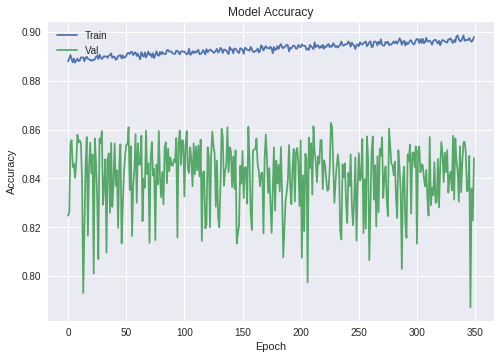

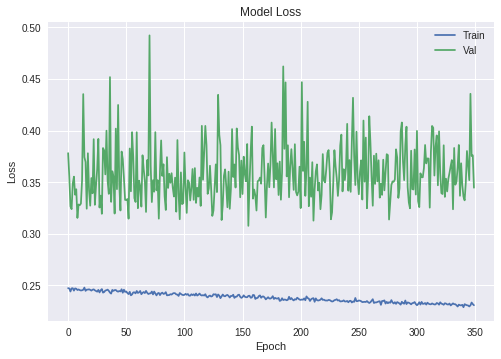

In [0]:
# visualize  results (history: accuracy & loss)

plot_acc(history, "Model Accuracy")
plot_loss(history, "Model Loss")

### Evaluate the model on the test set

In [0]:
# evaluate the model on the test set

x_test = df_ADL_Falls_test[x_columns]
y = df_ADL_Falls_test.loc[:,['Fall_ADL_BIN']]
y_test = np.array(y)

# Vamos a evaluar el "accuracy" del modelo
test_loss, test_acc = my_model_NN.evaluate(x_test, y_test)
print('El "accuracy" del modelo (en el conjunto de Test) es:', test_acc)
print('El "loss" del modelo (en el conjunto de Test) es:', test_loss)

14883/14883 [==============================] - 1s 91us/step
El "accuracy" del modelo (en el conjunto de Test) es: 0.8523147214943224
El "loss" del modelo (en el conjunto de Test) es: 0.32740583687757124


In [0]:
# HACEMOS PREDICCIONES EN TEST Y VEMOS EL ACCURACY:

y_pred = my_model_NN.predict(x_test)
Y_pred = np.argmax(y_pred, axis=1)

#cm = tf.confusion_matrix(y_test, Y_pred,2)
cm = tf.confusion_matrix(y_test, Y_pred,2)

import tensorflow as tf

#initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix (en Test):")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    #print (sess.run(cm))
    array = cm.eval(session=sess)
    print(array)


Confusion matrix (en Test):
[[6193 1269]
 [ 929 6492]]


In [0]:
# calculations of measurements of performance

n_TP = array[0,0]  
n_FP = array[1,0] 
n_TN = array[1,1]
n_FN = array[0,1]

print("-----------------------------")
print("-----------------------------")

# SENSITIVITY = TP / (TP + FN)
NN_Sensitivity = n_TP / (n_TP + n_FN)
print("NN_Sensitivity = "+ str(NN_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
NN_Specificity = n_TN / (n_FP + n_TN)
print("NN_Specificity = "+ str(NN_Specificity))

# Precision = TP / (TP + FP)
NN_Precision = n_TP / (n_TP + n_FP)
print("NN_Precision = "+ str(NN_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
NN_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("NN_Accuracy = "+ str(NN_Accuracy))

-----------------------------
-----------------------------
NN_Sensitivity = 0.8299383543285982
NN_Specificity = 0.8748147149979787
NN_Precision = 0.8695591126088178
NN_Accuracy = 0.8523147214943224


### Evaluate the model on the TRAINING set

In [0]:
# Evaluate the model on the TRAINING set:

y_pred = my_model_NN.predict(x_train)
Y_pred = np.argmax(y_pred, axis=1)

#cm = tf.confusion_matrix(y_test, Y_pred,2)
cm = tf.confusion_matrix(y_train, Y_pred,2)

import tensorflow as tf

#initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix (en Training):")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    # print (sess.run(cm))
    array = cm.eval(session=sess)
    print(array)


Confusion matrix (en Training):
[[44771  6930]
 [ 3457 48121]]


In [0]:
total= array[0,0]+array[0,1]

cm = cm/total
#initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix (normalized):")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    print (sess.run(cm))

Confusion matrix (normalized):
[[0.86596004 0.13403996]
 [0.06686524 0.93075569]]


In [0]:
# calculations of measurements of performance

n_TP = array[0,0]  
n_FP = array[1,0] 
n_TN = array[1,1]
n_FN = array[0,1]

print("-----------------------------")
print("-----------------------------")

# SENSITIVITY = TP / (TP + FN)
NN_Sensitivity = n_TP / (n_TP + n_FN)
print("NN_Sensitivity = "+ str(NN_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
NN_Specificity = n_TN / (n_FP + n_TN)
print("NN_Specificity = "+ str(NN_Specificity))

# Precision = TP / (TP + FP)
NN_Precision = n_TP / (n_TP + n_FP)
print("NN_Precision = "+ str(NN_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
NN_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("NN_Accuracy = "+ str(NN_Accuracy))

-----------------------------
-----------------------------
NN_Sensitivity = 0.8659600394576508
NN_Specificity = 0.9329752995463182
NN_Precision = 0.9283196483370656
NN_Accuracy = 0.8994277636305541


### Evaluate the model on the VALIDATION set

In [0]:
# HACEMOS PREDICCIONES EN VALIDATION Y VEMOS EL ACCURACY:

y_pred = my_model_NN.predict(x_val)
Y_pred = np.argmax(y_pred, axis=1)

#cm = tf.confusion_matrix(y_test, Y_pred,2)
cm = tf.confusion_matrix(y_val, Y_pred,2)

import tensorflow as tf

#initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix (en Validation):")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    #print (sess.run(cm))
    array = cm.eval(session=sess)
    print(array)

Confusion matrix (en Validation):
[[11732  2987]
 [ 1479 13240]]


In [0]:
total= array[0,0]+array[0,1]

cm = cm/total
#initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix (normalized):")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    print (sess.run(cm))

Confusion matrix (normalized):
[[0.79706502 0.20293498]
 [0.10048237 0.89951763]]


In [0]:
# calculations of measurements of performance

n_TP = array[0,0]  
n_FP = array[1,0] 
n_TN = array[1,1]
n_FN = array[0,1]

print("-----------------------------")
print("-----------------------------")

# SENSITIVITY = TP / (TP + FN)
NN_Sensitivity = n_TP / (n_TP + n_FN)
print("NN_Sensitivity = "+ str(NN_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
NN_Specificity = n_TN / (n_FP + n_TN)
print("NN_Specificity = "+ str(NN_Specificity))

# Precision = TP / (TP + FP)
NN_Precision = n_TP / (n_TP + n_FP)
print("NN_Precision = "+ str(NN_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
NN_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("NN_Accuracy = "+ str(NN_Accuracy))

-----------------------------
-----------------------------
NN_Sensitivity = 0.7970650180039405
NN_Specificity = 0.8995176302737957
NN_Precision = 0.8880478389221104
NN_Accuracy = 0.8482913241388681
